# IBTrACS
<!-- markdownlint-disable MD013 -->

Load IBTrACS from Postgres, and plot just to check the right stuff has been loaded.

In [69]:
%load_ext jupyter_black
%load_ext autoreload
%autoreload 2

The jupyter_black extension is already loaded. To reload it, use:
  %reload_ext jupyter_black
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [70]:
from src.datasources import ibtracs, zma

In [71]:
gdf_zma = zma.load_zma()

In [72]:
total_bounds = gdf_zma.total_bounds

In [73]:
total_bounds

array([-86.8,  18.5, -72.3,  24. ])

In [93]:
df_all = ibtracs.load_ibtracs_in_bounds(*total_bounds)

In [94]:
df_all

,point_id,sid,valid_time,latitude,longitude,wind_speed,gust_speed,pressure,max_wind_radius,last_closed_isobar_radius,last_closed_isobar_pressure,basin,nature,provider,quadrant_radius_34,quadrant_radius_50,quadrant_radius_64,created_at
0,a331c561-f8cb-4bcc-aadd-c202b1c8504b,2023239N21274,2023-08-26 12:00:00.000039,20.799999,-86.099998,25.0,NaN,1006.0,90.0,150.0,1009.0,NA,TS,nhc_working_bt,"[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]",2025-05-13 15:18:02.051817
1,3db2df23-07b1-44f4-a23a-bd77cddf56d7,2023239N21274,2023-08-26 15:00:00.000039,21.110016,-86.144974,25.0,NaN,1006.0,80.0,150.0,1009.0,NA,TS,None,"[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]",2025-05-13 15:18:02.051817
2,4df48827-5ab8-4afd-a2a8-3f20233d661f,2023239N21274,2023-08-26 18:00:00.000039,21.299999,-86.199997,25.0,NaN,1006.0,70.0,150.0,1009.0,NA,TS,nhc_working_bt,"[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]",2025-05-13 15:18:02.051817
3,900f30f2-8054-4cb7-88d3-e10412f20d75,2023239N21274,2023-08-26 21:00:00.000039,21.282465,-86.277428,27.0,NaN,1005.0,55.0,150.0,1008.0,NA,TS,None,"[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]",2025-05-13 15:18:02.051817
4,756a6d3a-0788-4c1c-b26d-dec33f0e8ff7,2023239N21274,2023-08-27 00:00:00.000039,21.100000,-86.400002,30.0,NaN,1004.0,40.0,150.0,1008.0,NA,TS,nhc_working_bt,"[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]",2025-05-13 15:18:02.051817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3058,7cf57cc4-077e-4fed-b350-afac9978121a,2021182N09317,2021-07-06 00:00:00.000039,22.900000,-82.000000,50.0,55.0,1005.0,20.0,90.0,1013.0,NA,TS,hurdat_atl,"[60.0, 50.0, nan, 50.0]","[30.0, nan, nan, nan]","[nan, nan, nan, nan]",2025-05-13 15:18:02.051817
3059,fa1abb38-b345-4e26-949a-50baf2594313,2021182N09317,2021-07-06 06:00:00.000039,23.700001,-82.400002,50.0,60.0,1005.0,20.0,90.0,1013.0,NA,TS,hurdat_atl,"[60.0, 50.0, nan, 50.0]","[30.0, nan, nan, nan]","[nan, nan, nan, nan]",2025-05-13 15:18:02.051817
3060,d48d459a-2d45-4acf-a983-991a85e59995,2021239N17281,2021-08-27 23:25:00.000045,22.400000,-83.199997,70.0,NaN,988.0,20.0,150.0,1010.0,NA,TS,hurdat_atl,"[80.0, 60.0, 40.0, 60.0]","[40.0, 30.0, nan, 20.0]","[20.0, nan, nan, nan]",2025-05-13 15:18:02.051817
3061,2da05cdf-1712-42c1-a123-0b2351cf3352,2021239N17281,2021-08-28 00:00:00.000039,22.600000,-83.500000,70.0,85.0,989.0,20.0,150.0,1010.0,NA,TS,hurdat_atl,"[100.0, 60.0, 40.0, 70.0]","[50.0, 30.0, nan, 30.0]","[20.0, nan, nan, nan]",2025-05-13 15:18:02.051817


In [95]:
df_all.dtypes

point_id                               object
sid                                    object
valid_time                     datetime64[ns]
latitude                              float64
longitude                             float64
wind_speed                            float64
gust_speed                            float64
pressure                              float64
max_wind_radius                       float64
last_closed_isobar_radius             float64
last_closed_isobar_pressure           float64
basin                                  object
nature                                 object
provider                               object
quadrant_radius_34                     object
quadrant_radius_50                     object
quadrant_radius_64                     object
created_at                     datetime64[ns]
dtype: object

In [105]:
def df_to_track_lines(df: pd.DataFrame) -> gpd.GeoDataFrame:
    """
    Convert a DataFrame of points to a GeoDataFrame of LineStrings,
    grouped by 'sid'.

    Parameters:
        df: DataFrame with 'sid', 'latitude', 'longitude' columns

    Returns:
        GeoDataFrame with one LineString per 'sid'
    """
    # Ensure sorted order if needed (e.g., by time)
    df = df.sort_values(["sid"])  # optionally add 'time' or similar

    # Group and build LineStrings
    lines = (
        df.groupby("sid")
        .filter(lambda g: len(g) >= 2)
        .groupby("sid")
        .apply(
            lambda g: LineString(zip(g["longitude"], g["latitude"])),
            include_groups=False,
        )
        .reset_index(name="geometry")
    )

    return gpd.GeoDataFrame(lines, geometry="geometry", crs="EPSG:4326")

In [106]:
gdf_lines = df_to_track_lines(df_all)

In [107]:
gdf_lines

,sid,geometry
0,1851228N13313,"LINESTRING (-74.3 19.4, -72.6 18.9, -83.6 23.9..."
1,1852232N21293,"LINESTRING (-73 21.7, -81.1 23.8, -74.9 22.1, ..."
2,1852264N13309,"LINESTRING (-73.6 21.9, -74 22.5, -74.4 23.2, ..."
3,1852278N14293,"LINESTRING (-83.1 18.7, -84.4 19.5, -85.5 20.4..."
4,1855236N12304,"LINESTRING (-72.3 19.5, -73.6 19.7)"
...,...,...
410,2022154N21273,"LINESTRING (-86.3 22.8, -85.1 23.9)"
411,2022266N12294,"LINESTRING (-82.4 18.7, -83 19.7, -83.3 20.8, ..."
412,2023152N26274,"LINESTRING (-83 23.3, -85 23.9, -84.60984 23.6..."
413,2023239N21274,"LINESTRING (-86.653 20.83007, -86.04275 19.862..."


<Axes: >

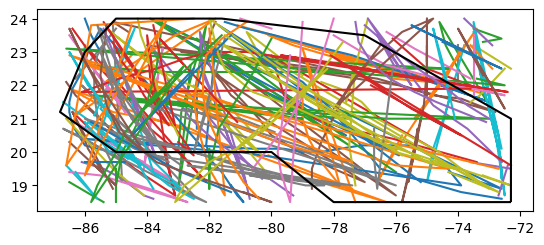

In [113]:
fig, ax = plt.subplots()
max_lines = 100
plotted_lines = 0
for sid, row in gdf_lines.iterrows():
    plotted_lines += 1
    if plotted_lines > max_lines:
        break
    x, y = row.geometry.xy
    ax.plot(x, y, label=str(row["sid"]))  # matplotlib auto-assigns color

gdf_zma.boundary.plot(ax=ax, color="k")

Looks like all the tracks are inside the ZMA, so should be good